In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn
import keras
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
import tensorflow as tf
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv(r"C:/Users/DIKSHA/Downloads/gas_turbines (1).csv")

In [3]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [5]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

<AxesSubplot:xlabel='NOX', ylabel='Density'>

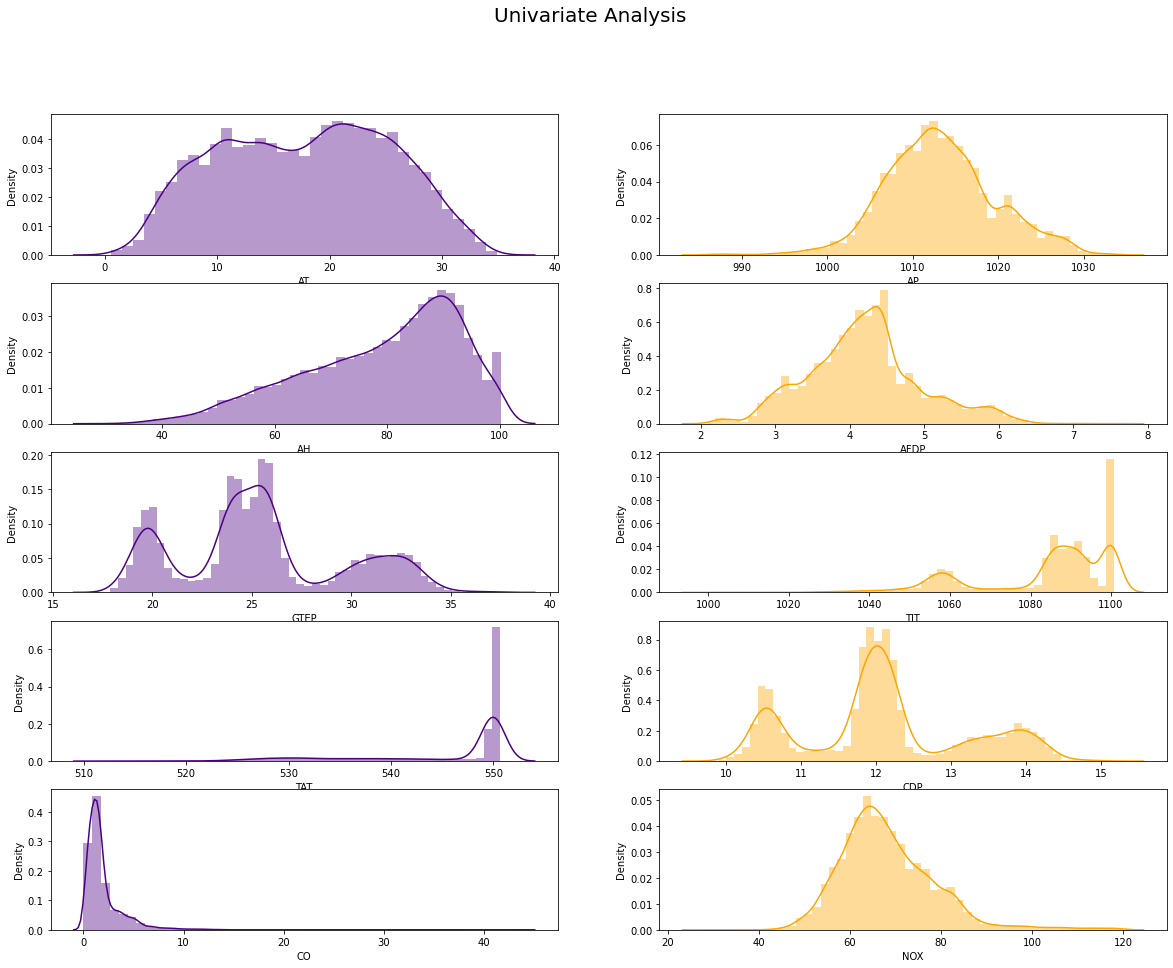

In [6]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(data['AT'],ax=axes[0,0],color='indigo')
sns.distplot(data['AP'],ax=axes[0,1],color='orange')
sns.distplot(data['AH'],ax=axes[1,0],color='indigo')
sns.distplot(data['AFDP'],ax=axes[1,1],color='orange')
sns.distplot(data['GTEP'],ax=axes[2,0],color='indigo')
sns.distplot(data['TIT'],ax=axes[2,1],color='orange')
sns.distplot(data['TAT'],ax=axes[3,0],color='indigo')
sns.distplot(data['CDP'],ax=axes[3,1],color='orange')
sns.distplot(data['CO'],ax=axes[4,0],color='indigo')
sns.distplot(data['NOX'],ax=axes[4,1],color='orange')

1. Left Skewness :  AH | TIT | TAT
2. Right Skewness : AFDP |  CO
3. AT | NOX  seems to have normally distribution

<AxesSubplot:xlabel='TEY', ylabel='Density'>

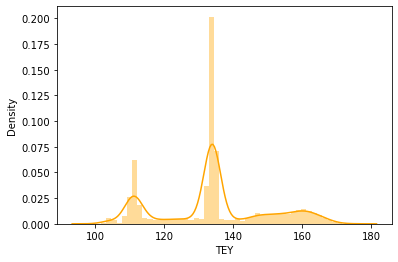

In [7]:
sns.distplot(data['TEY'],color='orange')

<AxesSubplot:xlabel='NOX', ylabel='TEY'>

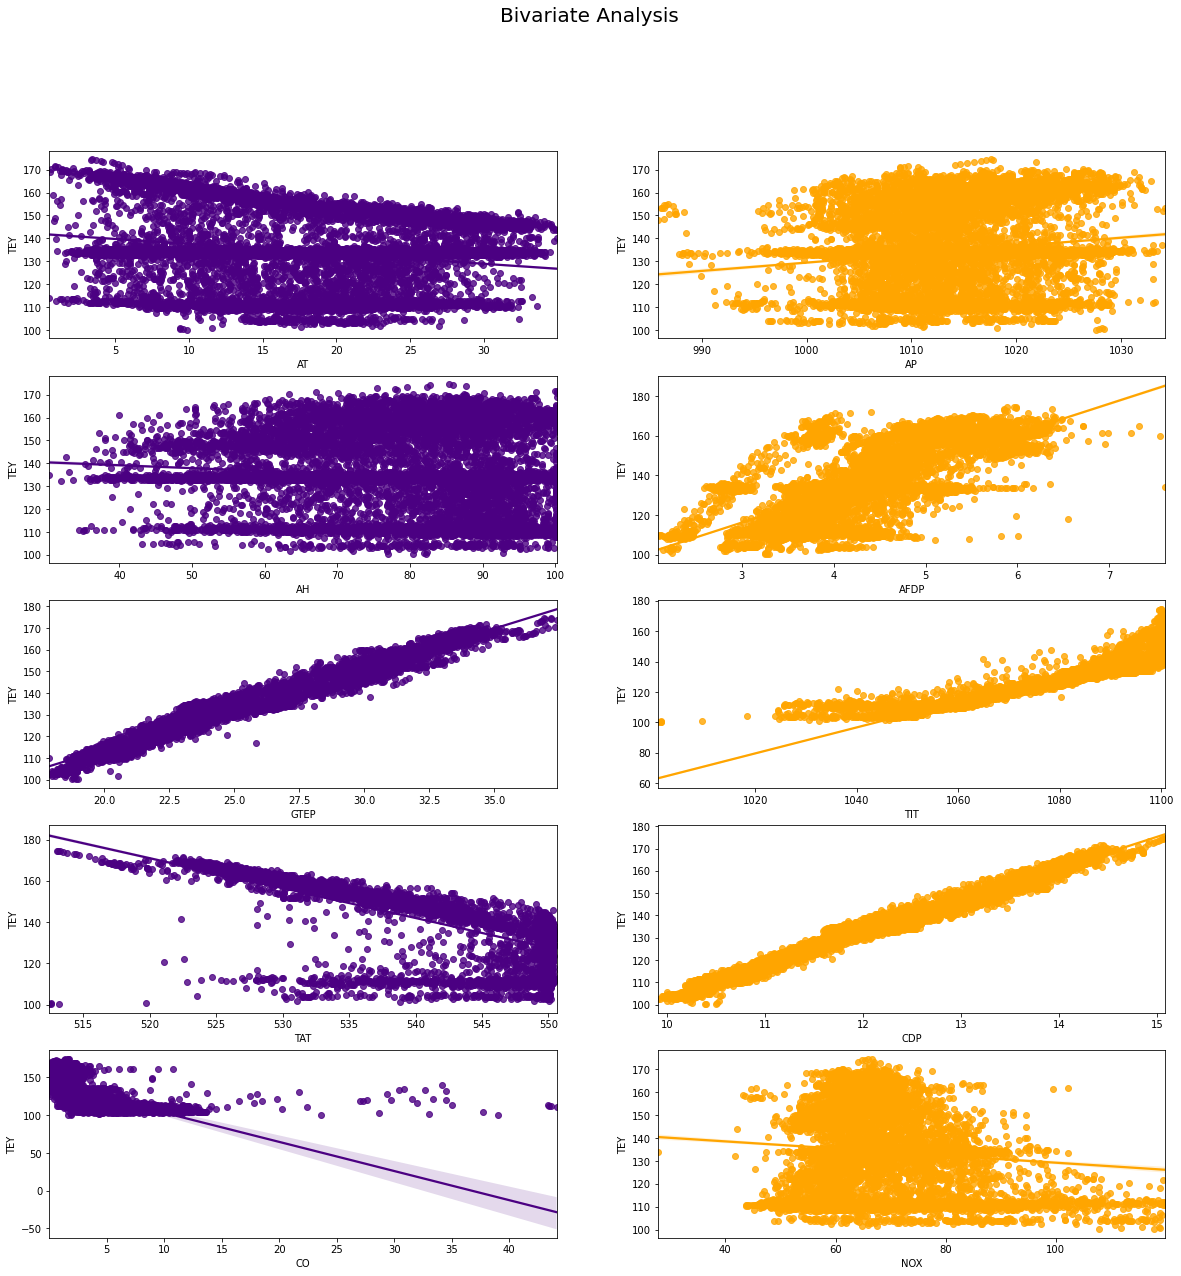

In [8]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Bivariate Analysis',fontsize=20)
sns.regplot(x="AT",y="TEY",data=data,ax=axes[0,0],color='indigo')
sns.regplot(x="AP",y="TEY",data=data,ax=axes[0,1],color='orange')
sns.regplot(x="AH",y="TEY",data=data,ax=axes[1,0],color='indigo')
sns.regplot(x="AFDP",y="TEY",data=data,ax=axes[1,1],color='orange')
sns.regplot(x="GTEP",y="TEY",data=data,ax=axes[2,0],color='indigo')
sns.regplot(x="TIT",y="TEY",data=data,ax=axes[2,1],color='orange')
sns.regplot(x="TAT",y="TEY",data=data,ax=axes[3,0],color='indigo')
sns.regplot(x="CDP",y="TEY",data=data,ax=axes[3,1],color='orange')
sns.regplot(x="CO",y="TEY",data=data,ax=axes[4,0],color='indigo')
sns.regplot(x="NOX",y="TEY",data=data,ax=axes[4,1],color='orange')

1. GTEP | CDP have a perfect Linear Increasing Relation with TEY
2. TIT | AFDP has slight Linear Increasing Relation with TEY
3. TAT | CO has slight Linear Decreasing Relation with TEY
4. AT | AP | AH | NOX have scattered points all around very less relation

<AxesSubplot:>

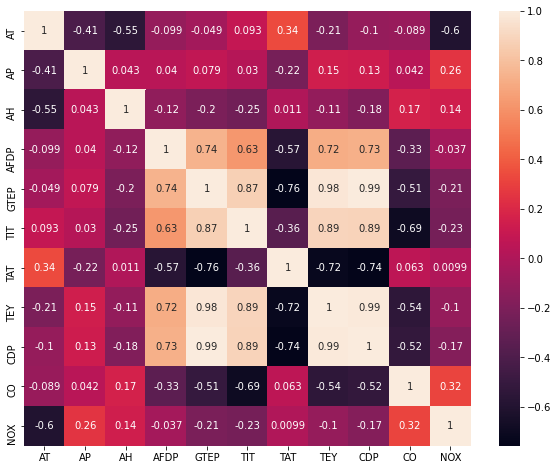

In [9]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)

# Defining Independent and Dependent Variables

In [10]:
X = data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= data.loc[:,['TEY']]

# K-Fold Cross Validation

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [12]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [13]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.14 (0.08) MSE


In [14]:
estimator.fit(X, y)
prediction = estimator.predict(X)

In [15]:
prediction

array([-1.2923757, -1.2759448, -1.2789437, ..., -1.6246557, -1.4892849,
       -1.3009862], dtype=float32)

# Applying inverse transform on prediction to bring original values

In [16]:
a=scaler.inverse_transform(prediction)

In [17]:
b=scaler.inverse_transform(y)

# Calculate error of model actual and predicted values

In [18]:
mean_squared_error(b,a)

33.82938860592723

# Using Train-Test Split Model Validation Technique

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [20]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [21]:
prediction

array([-1.5152891 , -1.0758272 ,  1.3623426 , ..., -0.43990922,
        0.44214213, -0.8495421 ], dtype=float32)

# Applying inverse transform on prediction to bring original values

In [22]:
c=scaler.inverse_transform(prediction)

In [23]:
d=scaler.inverse_transform(y_test)

In [24]:
mean_squared_error(d,c)

44.85770410421664